# 4.10 Task Part 1 (notebook 1)

## Table of Contents
### 4.10 Task Part 1 -- Question 1
### 4.10 Task Part 1 -- Question 2 (Removing PII)
### 4.10 Task Part 1 -- Question 3 (Creating regions from the state column)
### Comparing spending habits normalized by region
### Chart showing low and high spenders normalized number of customers in each region
### 4.10 Task Part 1 -- Question 4 (Excluding customers with <5 orders)
### 4.10 Task Part 1 -- Question 5 (Profiling variables)
### Bar chart of number of dependents by gender
### Bar chart for average days since prior order for each loyalty flag

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Creating path
path = r'C:\Users\Karen\Documents\Personal\Data Analytics\Career Foundry\Achievement 4\Instacart Basket Analysis'

## 1. Import the data set you exported in Exercise 4.9 into a new Jupyter notebook. This should be the merged version of your data that contains the new customers column.

In [3]:
# Importing data set

df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all.pkl'))

In [4]:
# Checking df

df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,First_Name,Last_Name,Gender,State,Age,date_joined,number_of_dependents,fam_status,income,_merge
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


In [5]:
df.tail()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,First_Name,Last_Name,Gender,State,Age,date_joined,number_of_dependents,fam_status,income,_merge
32404854,156685,106143,26,4,23,5.0,19675,1,1,Organic Raspberry Black Tea,...,Gerald,Yates,Male,Hawaii,25,5/26/2017,0,single,53755,both
32404855,484769,66343,1,6,11,NaN,47210,1,0,Fresh Farmed Tilapia Fillet,...,Jacqueline,Arroyo,Female,Tennessee,22,9/12/2017,3,married,46151,both
32404856,1561557,66343,2,1,11,30.0,47210,1,1,Fresh Farmed Tilapia Fillet,...,Jacqueline,Arroyo,Female,Tennessee,22,9/12/2017,3,married,46151,both
32404857,276317,66343,3,6,15,19.0,47210,1,1,Fresh Farmed Tilapia Fillet,...,Jacqueline,Arroyo,Female,Tennessee,22,9/12/2017,3,married,46151,both
32404858,2922475,66343,4,1,12,30.0,47210,1,1,Fresh Farmed Tilapia Fillet,...,Jacqueline,Arroyo,Female,Tennessee,22,9/12/2017,3,married,46151,both


In [6]:
df.shape

(32404859, 33)

## 2. Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

### I choose to exclude the first and last name columns from the data frame because they contain PII and are not necessary for the analysis.

In [7]:
# Excluding PII of first and last name. 

df = df.drop(columns = ['First_Name', 'Last_Name'])

In [8]:
# Checking df

df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,median_days_since_prior_order,regularity_flag,Gender,State,Age,date_joined,number_of_dependents,fam_status,income,_merge
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both


In [9]:
df.tail()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,median_days_since_prior_order,regularity_flag,Gender,State,Age,date_joined,number_of_dependents,fam_status,income,_merge
32404854,156685,106143,26,4,23,5.0,19675,1,1,Organic Raspberry Black Tea,...,7.0,Frequent customer,Male,Hawaii,25,5/26/2017,0,single,53755,both
32404855,484769,66343,1,6,11,NaN,47210,1,0,Fresh Farmed Tilapia Fillet,...,30.0,Non-frequent customer,Female,Tennessee,22,9/12/2017,3,married,46151,both
32404856,1561557,66343,2,1,11,30.0,47210,1,1,Fresh Farmed Tilapia Fillet,...,30.0,Non-frequent customer,Female,Tennessee,22,9/12/2017,3,married,46151,both
32404857,276317,66343,3,6,15,19.0,47210,1,1,Fresh Farmed Tilapia Fillet,...,30.0,Non-frequent customer,Female,Tennessee,22,9/12/2017,3,married,46151,both
32404858,2922475,66343,4,1,12,30.0,47210,1,1,Fresh Farmed Tilapia Fillet,...,30.0,Non-frequent customer,Female,Tennessee,22,9/12/2017,3,married,46151,both


In [10]:
df.shape

(32404859, 31)

# 3. The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.

In [11]:
# Creating a for-loop for regions

result = []

for value in df['State']:
    if value in ('Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 
                 'Pennsylvania', 'New Jersey'):
        result.append('Northeast')
    elif value in ('Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota' , 'South Dakota', 'Nebraska', 
                   'Kansas', 'Minnesota', 'Iowa', 'Missouri'):
        result.append('Midwest')
    elif value in ('Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 
                   'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 
                   'Oklahoma', 'Texas', 'Arkansas', 'Louisiana'):
        result.append('South')
    elif value in ('Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 
                   'Washington', 'Oregon', 'California', 'Hawaii'):
        result.append('West')
    else:
        result.append('Unknown')    

In [12]:
# Checking result list

result

['South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 '

In [13]:
# Making a new "Region" column with the result list

df['Region'] = result

In [14]:
# Finding the value counts for the new column

df['Region'].value_counts(dropna = False)

Region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

In [15]:
# Checking the numbers add up to the total number of records in the data frame

10791885 + 8292913 + 7597325 + 5722736

32404859

### Comparing spending habits in each region

In [36]:
# Creating new pivot table for 'Region' and 'spending_flag'

df4 = df.pivot_table(index='Region', columns='spending_flag', values='order_number', aggfunc='count', fill_value=0)

In [41]:
df4.head()

spending_flag,High spender,Low spender
Region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


In [42]:
# To normalize the spending_flag column based on the number of customers in each region:
# First, calculate the total number of customers in each region

total_customers = df.groupby('Region')['user_id'].count()

In [43]:
total_customers

Region
Midwest       7597325
Northeast     5722736
South        10791885
West          8292913
Name: user_id, dtype: int64

In [44]:
# Normalize the counts by dividing by the total customers in each region

result_normalized = df4.div(total_customers, axis=0)

In [45]:
result_normalized

spending_flag,High spender,Low spender
Region,,
Midwest,0.020530,0.979470
Northeast,0.018911,0.981089
South,0.019430,0.980570
West,0.019336,0.980664


In [46]:
# Multiply by 100 to express the result as a percentage
result_normalized_percent = result_normalized * 100

In [47]:
result_normalized_percent

spending_flag,High spender,Low spender
Region,,
Midwest,2.053025,97.946975
Northeast,1.891141,98.108859
South,1.943043,98.056957
West,1.933627,98.066373


Text(0.5, 1.0, 'Percent of High & Low Spenders by Region')

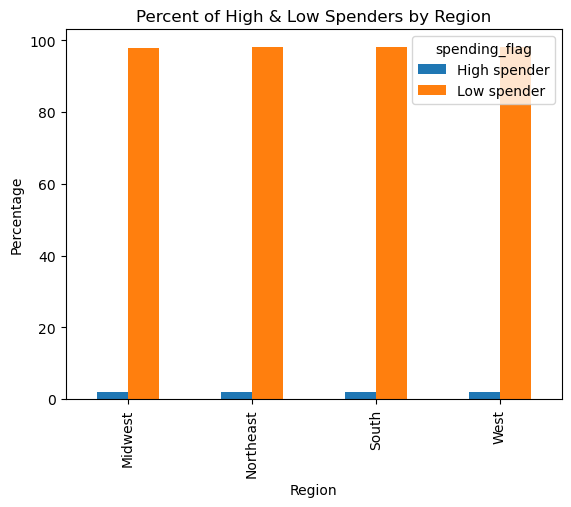

In [49]:
# Create a grouped bar chart from the result_normalized_percent results

result_normalized_percent.plot.bar()

# Add labels
plt.xlabel('Region')
plt.ylabel('Percentage')
plt.title('Percent of High & Low Spenders by Region')

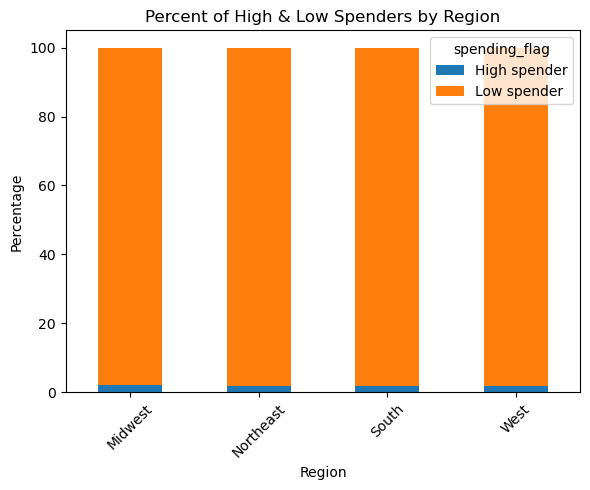

In [69]:
# Create a stacked bar chart from the result_normalized_percent results

# Set a figure size

fig, ax = plt.subplots(figsize=(6, 5)) 
spenders_by_region = result_normalized_percent.plot.bar(stacked=True, ax=ax) 

# Add labels and a title
plt.xlabel('Region')
plt.ylabel('Percentage')
plt.title('Percent of High & Low Spenders by Region')

# Rotate x-axis labels for readability
ax.set_xticklabels(result_normalized_percent.index, rotation=45)  

# Adjust the layout to ensure everything fits
plt.tight_layout()

# Save the chart as an image with adjusted bbox_inches
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'spenders_by_region_bar.png'), bbox_inches='tight', pad_inches=0.1)

In [70]:
# Removing the limit to columns displayed so I can see all the columns going forward

pd.options.display.max_columns = None

## 4. The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [79]:
# Creating exclusion flag

df['exclusion_flag'] = np.where(df['max_order'] < 5, 'Yes', 'No')

In [80]:
# Checking new column

df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_order_price,spending_flag,median_days_since_prior_order,regularity_flag,Gender,State,Age,date_joined,number_of_dependents,fam_status,income,_merge,Region,exclusion_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,No
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,No
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,No
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,No
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,No


In [81]:
df.tail()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_order_price,spending_flag,median_days_since_prior_order,regularity_flag,Gender,State,Age,date_joined,number_of_dependents,fam_status,income,_merge,Region,exclusion_flag
32404854,156685,106143,26,4,23,5.0,19675,1,1,Organic Raspberry Black Tea,94,7,10.7,Mid-range product,Least busy,Least busy days,Fewest orders,26,Regular customer,10.7,High spender,7.0,Frequent customer,Male,Hawaii,25,5/26/2017,0,single,53755,both,West,No
32404855,484769,66343,1,6,11,NaN,47210,1,0,Fresh Farmed Tilapia Fillet,15,12,8.1,Mid-range product,Regularly busy,Regularly busy,Most orders,4,New customer,8.1,Low spender,30.0,Non-frequent customer,Female,Tennessee,22,9/12/2017,3,married,46151,both,South,Yes
32404856,1561557,66343,2,1,11,30.0,47210,1,1,Fresh Farmed Tilapia Fillet,15,12,8.1,Mid-range product,Regularly busy,Busiest days,Most orders,4,New customer,8.1,Low spender,30.0,Non-frequent customer,Female,Tennessee,22,9/12/2017,3,married,46151,both,South,Yes
32404857,276317,66343,3,6,15,19.0,47210,1,1,Fresh Farmed Tilapia Fillet,15,12,8.1,Mid-range product,Regularly busy,Regularly busy,Most orders,4,New customer,8.1,Low spender,30.0,Non-frequent customer,Female,Tennessee,22,9/12/2017,3,married,46151,both,South,Yes
32404858,2922475,66343,4,1,12,30.0,47210,1,1,Fresh Farmed Tilapia Fillet,15,12,8.1,Mid-range product,Regularly busy,Busiest days,Most orders,4,New customer,8.1,Low spender,30.0,Non-frequent customer,Female,Tennessee,22,9/12/2017,3,married,46151,both,South,Yes


In [82]:
# Creating a new data frame for all the customers who have ordered fewer than 5 times.

df5 = df[df['exclusion_flag'] == 'Yes']

In [83]:
# Checking new data frame

df5.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_order_price,spending_flag,median_days_since_prior_order,regularity_flag,Gender,State,Age,date_joined,number_of_dependents,fam_status,income,_merge,Region,exclusion_flag
1510,520620,120,1,3,11,NaN,196,2,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy days,Most orders,3,New customer,9.385714,Low spender,19.0,Regular customer,Female,Kentucky,54,3/2/2017,2,married,99219,both,South,Yes
1511,3273029,120,3,2,8,19.0,196,2,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Average orders,3,New customer,9.385714,Low spender,19.0,Regular customer,Female,Kentucky,54,3/2/2017,2,married,99219,both,South,Yes
1512,520620,120,1,3,11,NaN,46149,1,0,Zero Calorie Cola,77,7,13.4,Mid-range product,Regularly busy,Least busy days,Most orders,3,New customer,9.385714,Low spender,19.0,Regular customer,Female,Kentucky,54,3/2/2017,2,married,99219,both,South,Yes
1513,3273029,120,3,2,8,19.0,46149,1,1,Zero Calorie Cola,77,7,13.4,Mid-range product,Regularly busy,Regularly busy,Average orders,3,New customer,9.385714,Low spender,19.0,Regular customer,Female,Kentucky,54,3/2/2017,2,married,99219,both,South,Yes
1514,520620,120,1,3,11,NaN,26348,3,0,Mixed Fruit Fruit Snacks,50,19,3.1,Low_range product,Regularly busy,Least busy days,Most orders,3,New customer,9.385714,Low spender,19.0,Regular customer,Female,Kentucky,54,3/2/2017,2,married,99219,both,South,Yes


In [84]:
df5.shape

(1440295, 33)

In [85]:
# Exporting df5 with the "under 5 orders" records

df5.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'under_five_orders.csv'))

In [86]:
# Removing the "under 5 orders" records from the main data frame.

df = df[df['exclusion_flag'] != 'Yes']

In [87]:
# Checking record removal

df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_order_price,spending_flag,median_days_since_prior_order,regularity_flag,Gender,State,Age,date_joined,number_of_dependents,fam_status,income,_merge,Region,exclusion_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,No
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,No
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,No
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,No
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,No


In [88]:
df.shape

(30964564, 33)

In [89]:
# Checking that the new number of records in the main data frame, plus the number of records in the excluded records
# data frame, matches the original data frame record number.

1440295 + 30964564

32404859

## 5. The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

In [91]:
# Exploration of different profiling variables

# First, what is the male/female split for customers?

df['Gender'].value_counts(dropna = False)

Gender
Male      15586740
Female    15377824
Name: count, dtype: int64

In [92]:
15586740+15377824

30964564

## There isn't a huge difference between the number of male and female customers.

In [93]:
# What is the split for customers with 0, 1, 2, or 3 dependents?

df['number_of_dependents'].value_counts(dropna = False)

number_of_dependents
3    7772516
0    7739681
2    7733261
1    7719106
Name: count, dtype: int64

## There isn't a huge difference between the number of dependents that customers have.

In [94]:
# Creating new pivot table for 'Gender' and 'number_of_dependents'

df6 = df.pivot_table(index='Gender', columns='number_of_dependents', values='order_id', aggfunc='count', fill_value=0)

In [96]:
df6

number_of_dependents,0,1,2,3
Gender,,,,
Female,3858283,3813296,3830944,3875301
Male,3881398,3905810,3902317,3897215


In [97]:
# I think the original pivot table for 'Region' and 'spending_flag' shouldn't have used 'order_number' as the value but
# 'order_id' instead. So I'm going to run that test again. However, this is after removing the 'under 5 orders' customers.

# Creating new pivot table for 'Region' and 'spending_flag'

df4 = df.pivot_table(index='Region', columns='spending_flag', values='order_id', aggfunc='count', fill_value=0)

In [98]:
df4

spending_flag,High spender,Low spender
Region,,
Midwest,148678,7112835
Northeast,103120,5361565
South,199339,10111800
West,152288,7774939


In [99]:
# To normalize the spending_flag column based on the number of customers in each region:
# First, calculate the total number of customers in each region

total_customers = df.groupby('Region')['user_id'].count()

In [100]:
total_customers

Region
Midwest       7261513
Northeast     5464685
South        10311139
West          7927227
Name: user_id, dtype: int64

In [101]:
# Normalize the counts by dividing by the total customers in each region

result_normalized = df4.div(total_customers, axis=0)

In [102]:
result_normalized

spending_flag,High spender,Low spender
Region,,
Midwest,0.020475,0.979525
Northeast,0.018870,0.981130
South,0.019332,0.980668
West,0.019211,0.980789


In [103]:
# Multiply by 100 to express the result as a percentage
result_normalized_percent = result_normalized * 100

In [104]:
result_normalized_percent

spending_flag,High spender,Low spender
Region,,
Midwest,2.047480,97.952520
Northeast,1.887026,98.112974
South,1.933239,98.066761
West,1.921075,98.078925


### The results are within 0.01% for both versions (using 'order_number' vs 'order_id' as the value.) 

In [109]:
# Looking at a bar chart of gender and number of dependents

# Grouping by 'gender' and calculating the sum of 'number_of_dependents'
df6 = df.groupby(['Gender', 'number_of_dependents']).size().unstack(fill_value=0)

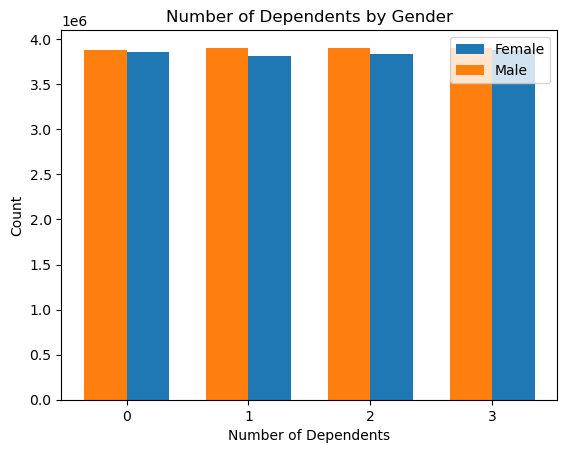

In [110]:
# Getting the unique dependent numbers

dependent_numbers = sorted(df['number_of_dependents'].unique())

# Setting up the bar positions
bar_width = 0.35 
index = range(len(dependent_numbers))

# Plotting bars for each gender and dependent number
for gender in df6.index:
    plt.bar([pos + bar_width * (1 if gender == 'Female' else 0) for pos in index],
            df6.loc[gender],
            width=bar_width,
            label=gender)

# Adding labels and title
plt.xlabel('Number of Dependents')
plt.ylabel('Count')
plt.title('Number of Dependents by Gender')
plt.xticks([pos + bar_width/2 for pos in index], dependent_numbers)

# Display legend
plt.legend()

## There is not a big difference between the 0, 1, 2, or 3 dependents in males and females

In [143]:
# Now I want to look at the loyalty flag compared to the mean days between orders.

# Grouping by 'loyalty_flag' and calculating the mean of 'days_since_prior_order'

df7 = df.groupby('loyalty_flag')['days_since_prior_order'].mean()

In [144]:
df7

loyalty_flag
Loyal customer       6.026656
New customer        17.598691
Regular customer    12.155135
Name: days_since_prior_order, dtype: float64

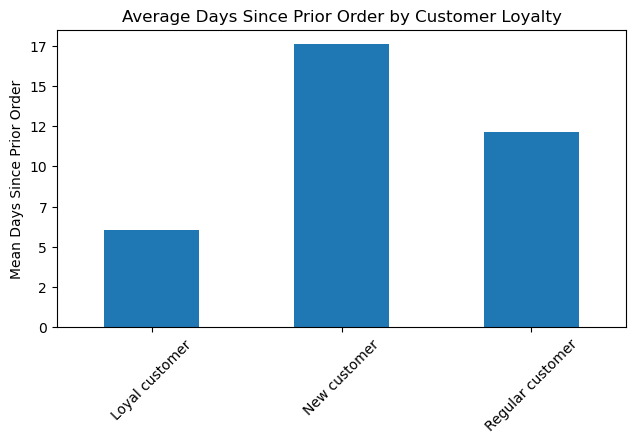

In [149]:
# Create a bar chart for average days since prior order for each loyalty flag

bar2 = df7.plot.bar()
plt.tight_layout()

# Adding labels and title
plt.xlabel('')
plt.ylabel('Mean Days Since Prior Order')
plt.title('Average Days Since Prior Order by Customer Loyalty')

# Rotate x-axis labels for readability
plt.xticks(range(len(df7.index)), df7.index, rotation=45)

# Format y-axis tick labels to display full numbers
def format_func(value, tick_number):
    return f'{int(value):,}'  # Format as integers with thousands separators

# Apply the formatter to the y-axis
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(format_func))

# Display the chart
plt.show()

In [153]:
# Exporting chart

bar2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'prior_order_loyalty.png'), bbox_inches='tight', pad_inches=0.1)

In [154]:
# Exporting the dataframe and closing the notebook. It is getting long and I will continue in a new notebook.

df.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all.pkl'))